In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
acc=accuracy_score(ytest,ypred)
acc

0.8181818181818182

In [10]:
cm=confusion_matrix(ytest,ypred)
cm

array([[97, 10],
       [18, 29]], dtype=int64)

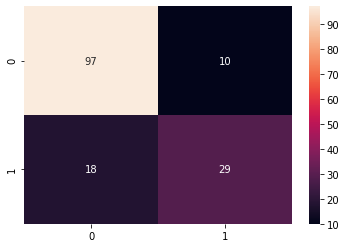

In [11]:
sns.heatmap(cm,annot=True)

In [12]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [ ]:
#tunning of svm hyperparameter
#model
model=SVC()

# parameter
kernel=['linear', 'poly', 'rbf', 'sigmoid']
C=[100,50,10,1,0.1,0.01]
gamma=['scale','auto']
#grid
grid={"kernel":kernel,"C":C,"gamma":gamma}

#cross_validator
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#gridSearch_cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")

#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

In [ ]:
help(SVC)